In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
ymca_data = pd.read_csv('/content/YMCA of Northern Alberta Hold Data(in).csv', encoding='latin-1')

/tmp/ipython-input-78456763.py:1: DtypeWarning: Columns (11,12,13,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  ymca_data = pd.read_csv('/content/YMCA of Northern Alberta Hold Data(in).csv', encoding='latin-1')


In [ ]:
print(ymca_data.columns)

Index(['Membership Hold ID', 'Application: CaseSafeID', 'Membership Location',
       'Application: Package: Category',
       'Application: Subscription: Membership Type',
       'Application: Subscription: Membership Category', 'Reason for Hold',
       'Other Hold Reason', 'Start Date', 'End Date',
       'Application: Account: CaseSafeID', 'Application: Contact: CaseSafeID',
       'Application: Contact: Age Category', 'Application: Contact: Birthdate',
       'Application: Contact: Gender',
       'Application: Contact: Mailing Zip/Postal Code',
       'Application: Contact: Initial Join Date', 'Created By: User Type'],
      dtype='object')


**DATA CLEANING STEPS**

1.  Dropping columns we don't need
2.  Changing datatypes of what's left
3.  Checking the unique values and correcting spelling errors
4.  Checking for duplicates
5.  Dealing with missing values
6.  Rename the columns
7.  Create/Calculate new feature columns | Age / Hold Duration / Tenure /
8.  Determine the type of encoding to be used for the features (2,3,4,5,6,8,9, 12,13,14,15,16):
        * 7 unique Reason for Hold...(One-hot encoding - multiple categories???
        * columns 8 and 9 will be combined for the hold duration.
*Location: Why are people in a particular region or age bracket holding more, what is happening in that location.

In [ ]:
ymca_data.head()

,Membership Hold ID,Application: CaseSafeID,Membership Location,Application: Package: Category,Application: Subscription: Membership Type,Application: Subscription: Membership Category,Reason for Hold,Other Hold Reason,Start Date,End Date,Application: Account: CaseSafeID,Application: Contact: CaseSafeID,Application: Contact: Age Category,Application: Contact: Birthdate,Application: Contact: Gender,Application: Contact: Mailing Zip/Postal Code,Application: Contact: Initial Join Date,Created By: User Type
0,a1GOO000003e6BR,a0wI9000000EAwgIAG,Castle Downs Family YMCA,Membership - Continuous,Enhanced,General,Medical/Health,NaN,12/17/2024,6/16/2025,0015w00002G9VjMAAV,0035w000039TzTWAA0,Child (2-12 years),10/25/2013,Male,T6V 1R7,4/12/2023,Standard
1,a1GOO000005gNew,a0wOO000000zQs1YAE,Jamie Platz Family YMCA,Membership Plus - Annual,Enhanced Plus,Plus,Program or Service Gap,NaN,6/13/2025,7/5/2025,0015w00002G9ZKaAAN,0035w000039U8XqAAK,Senior (65+ years),5/2/1940,Female,T5T 6H3,4/18/2002,Standard
2,a1GOO000001M9iP,a0wOO000000RWbhYAG,Castle Downs Family YMCA,Membership - Continuous,Essential,General,Medical/Health,NaN,5/6/2024,5/7/2024,0015w00002G9bvoAAB,0035w000039UJ01AAG,Adult (25-64 years),5/24/1990,Female,T5E 5Y8,3/24/2022,High Volume Portal
3,a1G5w00000Jfiqm,a0w5w000009STGOAA4,Castle Downs Family YMCA,Membership - Continuous,Enhanced,General,Vacation,NaN,8/31/2021,10/31/2021,0015w00002G9UnjAAF,0035w000039UR1rAAG,Senior (65+ years),2/12/1958,Female,T5C 2P6,1/14/2016,Standard
4,a1GOO000001oX8H,a0w5w00000ApcrhAAB,William Lutsky Family YMCA,Membership - Continuous,Enhanced,General,Other Recreation Alternatives,NaN,7/2/2024,1/1/2025,0015w00002WAFLtAAP,0035w00003TVcDoAAL,Child (2-12 years),12/7/2012,Male,T6J 4K2,8/17/2021,High Volume Portal


In [ ]:
ymca_data.sample(20)

,Membership Hold ID,Application: CaseSafeID,Membership Location,Application: Package: Category,Application: Subscription: Membership Type,Application: Subscription: Membership Category,Reason for Hold,Other Hold Reason,Start Date,End Date,Application: Account: CaseSafeID,Application: Contact: CaseSafeID,Application: Contact: Age Category,Application: Contact: Birthdate,Application: Contact: Gender,Application: Contact: Mailing Zip/Postal Code,Application: Contact: Initial Join Date,Created By: User Type
18116,a1GOO000001l4xF,a0wI90000004tklIAA,William Lutsky Family YMCA,Membership - Continuous,Enhanced,General,Other Recreation Alternatives,NaN,6/28/2024,7/3/2024,0015w00002G9c8PAAR,0035w000039UMYdAAO,Child (2-12 years),10/29/2014,Female,T6H 3R8,5/30/2022,High Volume Portal
40580,a1G5w00000JfK92,a0w5w000008RnSMAA0,William Lutsky Family YMCA,Membership - Annual,Enhanced,General,COVID-19,December 2020 COVID-19 Shutdown,2/24/2021,4/18/2021,0015w00002G9WpgAAF,0035w000039UQEWAA4,Adult (25-64 years),3/15/1982,Female,T6X 0T8,12/29/2019,Standard
41234,a1G5w00000JfOrz,a0w5w000009FBJvAAO,Jamie Platz Family YMCA,Membership - Continuous,Enhanced,General,COVID-19,NaN,4/8/2021,10/19/2021,0015w00002W7qxUAAR,0035w000039UQKJAA4,Adult (25-64 years),6/30/1981,Female,T5T 3Y6,11/17/2020,Standard
40316,a1G5w00000Jfbv0,a0w5w000008RndoAAC,William Lutsky Family YMCA,Membership - Annual,Enhanced,General,COVID-19,NaN,4/19/2021,6/16/2021,0015w00002G9WM3AAN,0035w000039UQC5AAO,Adult (25-64 years),4/30/1964,Female,T6W 2T7,6/11/2019,Standard
72058,a1GI90000004k68,a0wI90000004UzpIAE,Castle Downs Family YMCA,Membership - Continuous,Enhanced,General,NaN,NaN,6/20/2022,6/20/2022,0015w00002dcMYzAAM,NaN,NaN,NaN,NaN,NaN,NaN,High Volume Portal
1616,a1GI90000004sZr,a0wI90000004mQ0IAI,Jamie Platz Family YMCA,Membership - Continuous,Enhanced,General,Vacation,NaN,6/26/2022,9/1/2022,0015w00002G9aktAAB,0035w000039UJC3AAO,Adult (25-64 years),12/3/1975,Female,T5T5X6,1/25/2009,Standard
46255,a1GOO0000076A77,a0wI90000009QDdIAM,Jamie Platz Family YMCA,Membership Plus - Continuous,Enhanced Plus,Plus,Other,NaN,9/17/2025,10/16/2025,0015w00002hdletAAA,0035w000039UHysAAG,Adult (25-64 years),12/3/1981,Male,T5T 4S2,8/17/2021,High Volume Portal
79313,a1G5w00000JffXX,a0w5w000009EsSmAAK,Jamie Platz Family YMCA,Membership - Continuous,Enhanced,General,COVID-19,NaN,6/17/2021,8/9/2021,001I9000002mTGsIAM,NaN,NaN,NaN,NaN,NaN,NaN,Standard
39478,a1GI9000000CGa3,a0wI9000000BYt0IAG,Don Wheaton Family YMCA,Membership Plus - Annual,Enhanced Plus,Plus,Vacation,NaN,9/23/2023,10/28/2023,0015w00002hd6qkAAA,0035w00003ex6oMAAQ,Adult (25-64 years),3/16/1961,Female,T5R 5E3,1/10/2023,Standard
14657,a1GOO000000fKE5,a0wI90000007ok8IAA,William Lutsky Family YMCA,Membership - Continuous,Enhanced,General,Other,NaN,2/13/2024,3/12/2024,001I9000003HENiIAO,003I9000002ZVdwIAG,Adult (25-64 years),3/3/1990,Female,T6J 2X6,8/29/2022,High Volume Portal


In [ ]:
ymca_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103262 entries, 0 to 103261
Data columns (total 18 columns):
 #   Column                                          Non-Null Count   Dtype 
---  ------                                          --------------   ----- 
 0   Membership Hold ID                              103262 non-null  object
 1   Application: CaseSafeID                         103262 non-null  object
 2   Membership Location                             103262 non-null  object
 3   Application: Package: Category                  103262 non-null  object
 4   Application: Subscription: Membership Type      103262 non-null  object
 5   Application: Subscription: Membership Category  103262 non-null  object
 6   Reason for Hold                                 98177 non-null   object
 7   Other Hold Reason                               11183 non-null   object
 8   Start Date                                      103262 non-null  object
 9   End Date                             

In [ ]:
ymca_data.describe()

,Membership Hold ID,Application: CaseSafeID,Membership Location,Application: Package: Category,Application: Subscription: Membership Type,Application: Subscription: Membership Category,Reason for Hold,Other Hold Reason,Start Date,End Date,Application: Account: CaseSafeID,Application: Contact: CaseSafeID,Application: Contact: Age Category,Application: Contact: Birthdate,Application: Contact: Gender,Application: Contact: Mailing Zip/Postal Code,Application: Contact: Initial Join Date,Created By: User Type
count,103262,103262,103262,103262,103262,103262,98177,11183,103262,103262,103262,70085,70085,70085,67948,68599,70077,103262
unique,103262,40787,5,5,8,2,7,2137,2054,2118,22091,23273,6,14866,3,8271,4481,2
top,a1G5w00000JfJvv,a0wI9000000E0ymIAC,Jamie Platz Family YMCA,Membership - Continuous,Enhanced,General,COVID-19,December 2020 COVID-19 Shutdown,4/19/2021,6/16/2021,0015w00002G9bfYAAR,0035w000039UJ9dAAG,Adult (25-64 years),6/28/1970,Female,T5T 0H5,11/17/2020,Standard
freq,1,50,37920,76783,79542,88330,30575,5977,4820,6655,160,66,24485,66,34482,206,2594,84435


In [ ]:
ymca_data.isnull().sum()

,0
Membership Hold ID,0
Application: CaseSafeID,0
Membership Location,0
Application: Package: Category,0
Application: Subscription: Membership Type,0
Application: Subscription: Membership Category,0
Reason for Hold,5085
Other Hold Reason,92079
Start Date,0
End Date,0


In [ ]:
(ymca_data ['Created By: User Type']).value_counts()

,count
Created By: User Type,
Standard,84435
High Volume Portal,18827


In [ ]:
ymca_data['Application: Contact: Gender'].value_counts()

,count
Application: Contact: Gender,
Female,34482
Male,33375
Not Specified,91


What would be the difference what the "plus" is added to the package  type?

In [ ]:
ymca_data['Application: Package: Category'].value_counts()

,count
Application: Package: Category,
Membership - Continuous,76783
Membership - Annual,11525
Membership Plus - Continuous,9081
Membership Plus - Annual,5851
Employee & Volunteer Memberships,22


What does some of this membership type mean to you? are there any similarities, would we need to rename or ignore some of this?


In [ ]:
ymca_data['Application: Subscription: Membership Type'].value_counts()

,count
Application: Subscription: Membership Type,
Enhanced,79542
Enhanced Plus,13108
Essential,7914
Essential Plus,1832
Limited Access - CD Matinee,762
Limited Access - DW Express,56
Enhanced - Access Only,38
Limited Access - JP Matinee,10


In [ ]:
ymca_data['Reason for Hold'].value_counts()

,count
Reason for Hold,
COVID-19,30575
Vacation,28138
Other,11744
Other Recreation Alternatives,9093
Schedule Conflict (Busy),8740
Medical/Health,6585
Program or Service Gap,3302


In [ ]:
ymca_data['Application: Contact: Mailing Zip/Postal Code'].unique()

array(['T6V 1R7', 'T5T 6H3', 'T5E 5Y8', ..., 'T5T 2A6', 'T5T 2B4',
       'T5R5J2'], dtype=object)

In [122]:
ymca_data['Application: Contact: Mailing Zip/Postal Code'].value_counts().sum()

np.int64(68599)

Is YMCA Association Services a location by itself? or is it a data entry issue

In [123]:
ymca_data['Membership Location'].unique()

array(['Castle Downs Family YMCA', 'Jamie Platz Family YMCA',
       'William Lutsky Family YMCA', 'Don Wheaton Family YMCA',
       'YMCA Association Services'], dtype=object)

In [124]:
ymca_data['Membership Location'].value_counts()

,count
Membership Location,
Jamie Platz Family YMCA,37920
William Lutsky Family YMCA,34954
Castle Downs Family YMCA,19151
Don Wheaton Family YMCA,11215
YMCA Association Services,22


In [125]:
ymca_data['Other Hold Reason'].value_counts().head(10)

,count
Other Hold Reason,
December 2020 COVID-19 Shutdown,5977
waiting for swimming lesson,175
Ramadan,108
Pool Closure,81
Work,80
not using,62
COVID-19,62
work,57
Collections Hold Extension,55


In [126]:
ymca_data['Other Hold Reason'].nunique()

2137

In [127]:
ymca_data['Other Hold Reason'].isnull().sum()

np.int64(92079)

In [128]:
ymca_data['Other Hold Reason'].notnull().sum()

np.int64(11183)

In [129]:
ymca_data.duplicated().sum()

np.int64(0)

In [130]:
ymca_cleaned = ymca_data.copy() #making a copy of this dataset to initaite the cleaning process

Data Type Conversion

In [131]:
ymca_cleaned['Start Date'] = pd.to_datetime(ymca_cleaned['Start Date'])


In [132]:
ymca_cleaned['End Date'] = pd.to_datetime(ymca_cleaned['End Date'], errors='coerce') # there is an incorrect entery of the year in this data, the date '8/31/2555' is causing this issue.I am using errors = coerce to force panda to convert it into NaT for now, so other columns can be converted.

In [133]:
# Identify the rows in the original data with the incorrect date string
incorrect_date_mask = ymca_data['End Date'] == '8/31/2555'

# Get the indices of these rows
incorrect_date_indices = ymca_data.loc[incorrect_date_mask].index

# Update the 'End Date' in the cleaned DataFrame for these indices to the corrected date
ymca_cleaned.loc[incorrect_date_indices, 'End Date'] = pd.to_datetime('8/31/2025')

# Verify the change by displaying the updated rows
display(ymca_cleaned.loc[incorrect_date_indices])

,Membership Hold ID,Application: CaseSafeID,Membership Location,Application: Package: Category,Application: Subscription: Membership Type,Application: Subscription: Membership Category,Reason for Hold,Other Hold Reason,Start Date,End Date,Application: Account: CaseSafeID,Application: Contact: CaseSafeID,Application: Contact: Age Category,Application: Contact: Birthdate,Application: Contact: Gender,Application: Contact: Mailing Zip/Postal Code,Application: Contact: Initial Join Date,Created By: User Type
4907,a1GOO000006YcfJ,a0wI9000000EHWpIAO,Castle Downs Family YMCA,Membership - Continuous,Enhanced,General,Other,NaN,2025-08-18,2025-08-31,001I9000002oUzgIAE,003I90000026Z2vIAE,Child (2-12 years),4/14/2016,Male,T6V 1E5,4/17/2023,High Volume Portal


In [134]:
# Find rows where 'End Date' was coerced to NaT
rows_with_nat_end_date = ymca_cleaned[ymca_cleaned['End Date'].isna()]
display(rows_with_nat_end_date)

,Membership Hold ID,Application: CaseSafeID,Membership Location,Application: Package: Category,Application: Subscription: Membership Type,Application: Subscription: Membership Category,Reason for Hold,Other Hold Reason,Start Date,End Date,Application: Account: CaseSafeID,Application: Contact: CaseSafeID,Application: Contact: Age Category,Application: Contact: Birthdate,Application: Contact: Gender,Application: Contact: Mailing Zip/Postal Code,Application: Contact: Initial Join Date,Created By: User Type
52694,a1GOO000004iayL,a0wI9000000DosqIAC,Jamie Platz Family YMCA,Membership - Continuous,Enhanced,General,Other,NaN,2025-04-14,NaT,001I9000005HRlWIAW,003I9000004ZgecIAC,Child (2-12 years),1/27/2020,Female,T5T 7G4,3/29/2023,High Volume Portal


In [135]:
# Identify the row in the original data with the incorrect date string '4/12/3025'
incorrect_date_mask_2 = ymca_data['End Date'] == '4/12/3025'

# Get the index of this row
incorrect_date_index_2 = ymca_data.loc[incorrect_date_mask_2].index

# Update the 'End Date' in the cleaned DataFrame for this index to the corrected date
ymca_cleaned.loc[incorrect_date_index_2, 'End Date'] = pd.to_datetime('4/12/2025')

# Verify the change by checking if there are any more NaT values in 'End Date'
print("Number of NaT values in 'End Date' after correcting '4/12/3025':")
display(ymca_cleaned['End Date'].isna().sum())

Number of NaT values in 'End Date' after correcting '4/12/3025':


np.int64(0)

In [136]:
# Get the index of the row with NaT in 'End Date' in the cleaned DataFrame
nat_index = ymca_cleaned[ymca_cleaned['End Date'].isna()].index

# Display the 'End Date' from the original DataFrame for that index
if not nat_index.empty:
    original_date = ymca_data.loc[nat_index, 'End Date']
    print("Original 'End Date' for the row with NaT:")
    display(original_date)
else:
    print("No rows with NaT found in 'End Date' after correction.")

No rows with NaT found in 'End Date' after correction.


In [140]:
ymca_cleaned['Application: Contact: Birthdate'] = pd.to_datetime(ymca_cleaned['Application: Contact: Birthdate'])
ymca_cleaned['Application: Contact: Initial Join Date'] = pd.to_datetime(ymca_cleaned['Application: Contact: Initial Join Date'])

In [141]:
from datetime import datetime

# Calculate Age based on the Start Date of the hold
ymca_cleaned['Age'] = (ymca_cleaned['Start Date'] - ymca_cleaned['Application: Contact: Birthdate']).dt.days / 365.25

# Calculate Hold Duration in days
ymca_cleaned['Hold Duration (days)'] = (ymca_cleaned['End Date'] - ymca_cleaned['Start Date']).dt.days

# Calculate Proxy Tenure in days (from initial join date to start of hold)
ymca_cleaned['Tenure (days)'] = (ymca_cleaned['Start Date'] - ymca_cleaned['Application: Contact: Initial Join Date']).dt.days

# Flag Potential Rejoins
# Sort by Contact ID and Initial Join Date to find previous join dates
ymca_cleaned.sort_values(by=['Application: Contact: CaseSafeID', 'Application: Contact: Initial Join Date'], inplace=True)

# Calculate the time difference between consecutive join dates for the same contact
ymca_cleaned['Previous Join Date'] = ymca_cleaned.groupby('Application: Contact: CaseSafeID')['Application: Contact: Initial Join Date'].shift(1)
ymca_cleaned['Time Since Last Membership (days)'] = (ymca_cleaned['Application: Contact: Initial Join Date'] - ymca_cleaned['Previous Join Date']).dt.days

# Flag rows where there's a significant gap (you can define 'significant' based on your understanding of the data)
# For now, let's flag if the gap is more than, say, 30 days.
ymca_cleaned['Potential Rejoin'] = ymca_cleaned['Time Since Last Membership (days)'] > 30

# Handle the first record for each contact (where Previous Join Date is NaT)
ymca_cleaned['Potential Rejoin'].fillna(False, inplace=True)


display(ymca_cleaned[['Application: Contact: CaseSafeID', 'Application: Contact: Birthdate', 'Start Date', 'End Date', 'Application: Contact: Initial Join Date', 'Age', 'Hold Duration (days)', 'Tenure (days)', 'Previous Join Date', 'Time Since Last Membership (days)', 'Potential Rejoin']].sample(20))

/tmp/ipython-input-1119968306.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ymca_cleaned['Potential Rejoin'].fillna(False, inplace=True)


,Application: Contact: CaseSafeID,Application: Contact: Birthdate,Start Date,End Date,Application: Contact: Initial Join Date,Age,Hold Duration (days),Tenure (days),Previous Join Date,Time Since Last Membership (days),Potential Rejoin
26950,0035w00003cdWgSAAU,2019-03-11,2024-08-07,2024-09-10,2024-03-26,5.409993,34,134.0,2024-03-26,0.0,False
18561,0035w000039USU1AAO,1975-05-27,2024-01-16,2024-01-26,2022-08-08,48.640657,10,526.0,2022-08-08,0.0,False
57960,003OO000006kZSYYA2,1964-11-12,2024-05-13,2024-06-02,2024-02-07,59.498973,20,96.0,NaT,NaN,False
41276,0035w000039UQKJAA4,1981-06-30,2024-06-19,2024-07-18,2020-11-17,42.970568,29,1310.0,2020-11-17,0.0,False
33385,0035w000039UFJoAAO,1965-12-09,2023-07-12,2023-07-25,2010-09-16,57.587953,13,4682.0,2010-09-16,0.0,False
20982,0035w000039U3lQAAS,1960-12-13,2020-03-14,2020-11-17,2020-02-28,59.249829,248,15.0,2020-02-28,0.0,False
64171,NaN,NaT,2023-05-13,2023-06-18,NaT,NaN,36,NaN,NaT,NaN,False
36610,0035w00003eu2guAAA,2017-10-25,2023-06-03,2023-07-07,2022-03-31,5.604381,34,429.0,NaT,NaN,False
97946,NaN,NaT,2020-11-09,2021-05-08,NaT,NaN,180,NaN,NaT,NaN,False
74839,NaN,NaT,2022-03-24,2022-07-06,NaT,NaN,104,NaN,NaT,NaN,False


In [142]:
ymca_cleaned.rename(columns={
    'Application: Contact: CaseSafeID': 'Contact_ID',
    'Application: Account: CaseSafeID': 'Account_ID',
    'Application: CaseSafeID': 'Membership_ID',
    'Application: Contact: Birthdate': 'Birthdate',
    'Application: Contact: Initial Join Date': 'Initial_Join_Date',
    'Start Date': 'Hold_Start_Date',
    'End Date': 'Hold_End_Date',
    'Application: Contact: Gender': 'Gender',
    'Application: Contact: Age Category': 'Age_Group',
    'Application: Package: Category': 'Package_Type',
    'Application: Subscription: Membership Type': 'Membership_Type',
    'Application: Subscription: Membership Category': 'Membership_Category',
    'Application: Contact: Mailing Zip/Postal Code': 'Postal_Code',
    'Membership Location': 'Location',
    'Created By: User Type': 'Hold_Initiated_By',
    'Reason for Hold': 'Hold_Reason',
    'Other Hold Reason': 'Other_Hold_Reason',
    'Grouped Hold Reason': 'Grouped_Hold_Reason',
    'Final Hold Reason': 'Final_Hold_Reason'
}, inplace=True)

# Display the first few rows to show the new column names
display(ymca_cleaned.head())

,Membership Hold ID,Membership_ID,Location,Package_Type,Membership_Type,Membership_Category,Hold_Reason,Other_Hold_Reason,Hold_Start_Date,Hold_End_Date,...,Gender,Postal_Code,Initial_Join_Date,Hold_Initiated_By,Age,Hold Duration (days),Tenure (days),Previous Join Date,Time Since Last Membership (days),Potential Rejoin
0,a1GOO000003e6BR,a0wI9000000EAwgIAG,Castle Downs Family YMCA,Membership - Continuous,Enhanced,General,Medical/Health,NaN,2024-12-17,2025-06-16,...,Male,T6V 1R7,2023-04-12,Standard,11.145791,181,615.0,NaT,NaN,False
6,a1G5w00000JfUvI,a0w5w000008Rnj1AAC,Don Wheaton Family YMCA,Membership - Annual,Enhanced,General,COVID-19,NaN,2021-06-11,2021-09-06,...,Male,T5K2Y2,2003-11-26,Standard,47.394935,87,6407.0,NaT,NaN,False
12,a1G5w00000JfjTF,a0w5w000008Rnj1AAC,Don Wheaton Family YMCA,Membership - Annual,Enhanced,General,COVID-19,NaN,2021-09-07,2022-03-06,...,Male,T5K2Y2,2003-11-26,Standard,47.635866,180,6495.0,2003-11-26,0.0,False
18,a1G5w00000JQk9R,a0w5w000008Rnj1AAC,Don Wheaton Family YMCA,Membership - Annual,Enhanced,General,COVID-19,NaN,2020-11-17,2021-02-23,...,Male,T5K2Y2,2003-11-26,Standard,46.830938,98,6201.0,2003-11-26,0.0,False
24,a1G5w00000JfMws,a0w5w000008Rnj1AAC,Don Wheaton Family YMCA,Membership - Annual,Enhanced,General,COVID-19,NaN,2021-03-31,2021-06-10,...,Male,T5K2Y2,2003-11-26,Standard,47.197810,71,6335.0,2003-11-26,0.0,False


In [179]:
ymca_cleaned.columns

Index(['Membership Hold ID', 'Membership_ID', 'Location', 'Package_Type',
       'Membership_Type', 'Membership_Category', 'Hold_Reason',
       'Other_Hold_Reason', 'Hold_Start_Date', 'Hold_End_Date', 'Account_ID',
       'Contact_ID', 'Age_Group', 'Birthdate', 'Gender', 'Postal_Code',
       'Initial_Join_Date', 'Hold_Initiated_By', 'Age', 'Hold Duration (days)',
       'Tenure (days)', 'Previous Join Date',
       'Time Since Last Membership (days)', 'Potential Rejoin',
       'Grouped Hold Reason', 'Final Hold Reason'],
      dtype='object')

In [156]:
categorical_cols = ['Location', 'Package_Type',
                    'Membership_Type',
                    'Membership_Category',
                    'Hold_Reason', 'Age_Group',
                    'Gender', 'Hold_Initiated_By']
ymca_cleaned[categorical_cols] = ymca_cleaned[categorical_cols].astype('category')

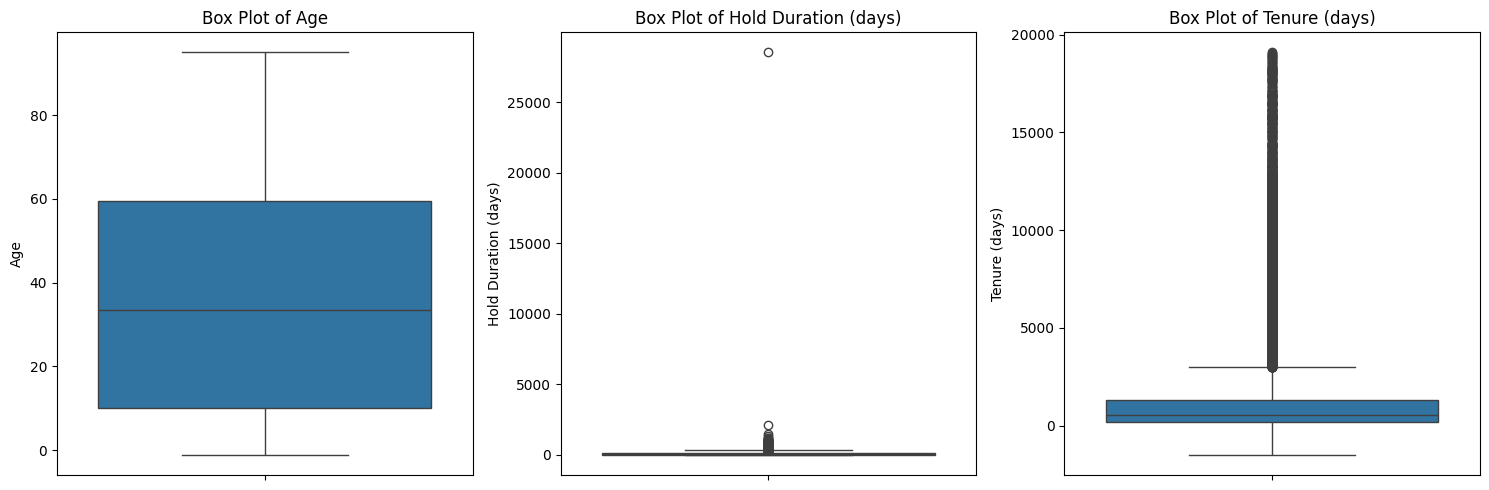

In [158]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = ['Age', 'Hold Duration (days)', 'Tenure (days)']

plt.figure(figsize=(15, 5))

for i, col in enumerate(numerical_cols):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(y=ymca_cleaned[col])
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

In [159]:
numerical_cols = ['Age', 'Hold Duration (days)', 'Tenure (days)']

print("Descriptive statistics for numerical columns:")
display(ymca_cleaned[numerical_cols].describe())

Descriptive statistics for numerical columns:


,Age,Hold Duration (days),Tenure (days)
count,70085.000000,103262.000000,70077.000000
mean,35.228748,88.821822,1442.787291
std,25.513303,119.987056,2310.146008
min,-1.180014,-5.000000,-1501.000000
25%,10.050650,27.000000,194.000000
50%,33.494867,60.000000,545.000000
75%,59.583847,143.000000,1325.000000
max,94.965092,28519.000000,19093.000000


In [160]:
print("Unique values in 'Age' column:")
display(ymca_cleaned['Age'].unique())

print("\nData type of 'Age' column:")
display(ymca_cleaned['Age'].dtype)

Unique values in 'Age' column:


array([11.14579055, 47.39493498, 47.63586585, ..., 56.33127995,
       19.20876112,         nan])


Data type of 'Age' column:


dtype('float64')

In [162]:
# Convert 'Hold_Initiated_By' to category
ymca_cleaned['Hold_Initiated_By'] = ymca_cleaned['Hold_Initiated_By'].astype('category')

#  Convert Zip/Postal Code to category if used for analysis
ymca_cleaned['Postal_Code'] = ymca_cleaned['Postal_Code'].astype('category')

In [98]:
ymca_cleaned['Other Hold Reason'] = ymca_cleaned['Other Hold Reason'].astype('category')
ymca_cleaned['Grouped Hold Reason'] = ymca_cleaned['Grouped Hold Reason'].astype('category')
ymca_cleaned['Final Hold Reason'] = ymca_cleaned['Final Hold Reason'].astype('category')

In [163]:
ymca_cleaned.dtypes

,0
Membership Hold ID,object
Membership_ID,object
Location,category
Package_Type,category
Membership_Type,category
Membership_Category,category
Hold_Reason,category
Other_Hold_Reason,object
Hold_Start_Date,datetime64[ns]
Hold_End_Date,datetime64[ns]


In [165]:
ymca_cleaned['Other_Hold_Reason'] = ymca_cleaned['Other_Hold_Reason'].str.lower().str.strip()

In [167]:
ymca_cleaned['Other_Hold_Reason'].value_counts()

,count
Other_Hold_Reason,
december 2020 covid-19 shutdown,5977
waiting for swimming lesson,179
work,138
not using,137
ramadan,124
...,...
transferring m/s to essential,1
on hold until figure out potential refund,1
teach pool broken.,1


In [168]:
def group_hold_reason(reason):
    if pd.isnull(reason):
        return 'Unknown'
    reason = reason.lower()

    if 'covid' in reason or 'shutdown' in reason:
        return 'COVID-19'
    elif 'financial' in reason or 'unpaid' in reason or 'declined' in reason or 'payment' in reason or 'collection hold extension' in reason or 'collections hold extension' in reason:
        return 'Financial'
    elif 'work' in reason or 'working' in reason:
        return 'Work-related'
    elif 'come in' in reason or 'not able to come' in reason or 'resides in europe' in reason or 'moving' in reason or 'not using' in reason or 'out of town' in reason:
        return 'Unable to come in'
    elif 'swimming' in reason or 'lesson' in reason or 'swim' in reason:
        return 'Swimming lesson'
    elif 'vacation' in reason or 'summer' in reason:
        return 'Vacation'
    elif 'ramadan' in reason:
        return 'Religious observance'
    elif 'school' in reason or 'busy' in reason or 'taking a break' in reason:
        return 'Schedule conflict'
    elif 'policy' in reason:
        return 'Policy-related'
    elif reason == 'na':
        return 'Unknown'
    else:
        return 'Other'

In [170]:
ymca_cleaned['Grouped Hold Reason'] = ymca_cleaned['Other_Hold_Reason'].apply(group_hold_reason)
display(ymca_cleaned['Grouped Hold Reason'].value_counts())

,count
Grouped Hold Reason,
Unknown,92110
COVID-19,6076
Other,1994
Swimming lesson,956
Financial,585
Unable to come in,496
Work-related,395
Schedule conflict,292
Religious observance,130


In [172]:
ymca_cleaned[ymca_cleaned['Grouped Hold Reason'] == 'Other']['Other_Hold_Reason'].value_counts().head(20)

,count
Other_Hold_Reason,
pool closure,120
pool closed,73
schedule conflict,27
out of country,27
winter,25
scheduling,23
weather,20
no reason provided,20
winter break,18


In [173]:
# See all original reasons grouped under 'COVID-19'
ymca_cleaned[ymca_cleaned['Grouped Hold Reason'] == 'COVID-19']['Other_Hold_Reason'].value_counts()

,count
Other_Hold_Reason,
december 2020 covid-19 shutdown,5977
covid-19,62
shutdown,17
the whole family has covid,4
covid,4
worried about covid still,2
summer pool shutdown,2
covid restrictions no swim club,2
covid concerns,1


In [175]:
ymca_cleaned['Final Hold Reason'] = ymca_cleaned['Grouped Hold Reason']
# If 'Grouped Hold Reason' is 'Unknown', use 'Reason for Hold'
ymca_cleaned.loc[ymca_cleaned['Grouped Hold Reason'] == 'Unknown', 'Final Hold Reason'] = ymca_cleaned['Hold_Reason']

In [176]:
ymca_cleaned['Final Hold Reason'].value_counts()

,count
Final Hold Reason,
COVID-19,30642
Vacation,28245
Other Recreation Alternatives,9088
Schedule Conflict (Busy),8734
Other,8620
Medical/Health,6581
Program or Service Gap,3302
Swimming lesson,956
Financial,585


Grouped Hold Reason = cleaned version of Other Hold Reason

Final Hold Reason = best available reason, combining both Grouped Hold Reason and Reason for Hold

In [177]:
ymca_cleaned.sample(30)

,Membership Hold ID,Membership_ID,Location,Package_Type,Membership_Type,Membership_Category,Hold_Reason,Other_Hold_Reason,Hold_Start_Date,Hold_End_Date,...,Initial_Join_Date,Hold_Initiated_By,Age,Hold Duration (days),Tenure (days),Previous Join Date,Time Since Last Membership (days),Potential Rejoin,Grouped Hold Reason,Final Hold Reason
45958,a1GOO0000014bRp,a0wI90000004m4IIAQ,Castle Downs Family YMCA,Membership - Continuous,Enhanced,General,Vacation,NaN,2024-04-28,2024-04-28,...,2022-05-25,High Volume Portal,10.091718,0,704.0,2022-05-25,0.0,False,Unknown,Vacation
29729,a1GI9000000Aoj9,a0wI9000000AljfIAC,Castle Downs Family YMCA,Membership - Continuous,Essential,General,Vacation,NaN,2023-05-01,2023-09-30,...,2022-02-28,Standard,68.941821,152,427.0,2022-02-28,0.0,False,Unknown,Vacation
96762,a1G5w00000JfgHp,a0w5w000009SsXmAAK,Jamie Platz Family YMCA,Membership - Continuous,Enhanced,General,COVID-19,NaN,2020-11-17,2021-05-23,...,NaT,Standard,NaN,187,NaN,NaT,NaN,False,Unknown,COVID-19
74040,a1G5w00000LrVww,a0w5w00000Aq6w4AAB,Jamie Platz Family YMCA,Membership - Continuous,Enhanced,General,Other,waiting for swimming lesson to start on march,2021-12-15,2022-03-01,...,NaT,Standard,NaN,76,NaN,NaT,NaN,False,Swimming lesson,Swimming lesson
9784,a1GOO000002i7iz,a0wI9000000HruPIAS,Jamie Platz Family YMCA,Membership - Continuous,Enhanced,General,Other Recreation Alternatives,NaN,2024-09-06,2024-09-06,...,2023-09-09,Standard,40.662560,0,363.0,NaT,NaN,False,Unknown,Other Recreation Alternatives
1627,a1GOO000004PQLB,a0wI9000000CAVTIA4,William Lutsky Family YMCA,Membership Plus - Annual,Enhanced Plus,Plus,Medical/Health,NaN,2025-03-11,2025-04-14,...,1997-12-01,Standard,69.007529,34,9962.0,1997-12-01,0.0,False,Unknown,Medical/Health
87066,a1G5w00000JfOg3,a0w5w000008RqHjAAK,William Lutsky Family YMCA,Membership - Annual,Enhanced,General,COVID-19,NaN,2021-04-07,2021-07-05,...,NaT,Standard,NaN,89,NaN,NaT,NaN,False,Unknown,COVID-19
48323,a1GI9000000CVWR,a0wI9000000CjcSIAS,Castle Downs Family YMCA,Membership - Continuous,Enhanced,General,Other Recreation Alternatives,NaN,2023-10-17,2024-04-16,...,2023-02-18,Standard,7.720739,182,241.0,NaT,NaN,False,Unknown,Other Recreation Alternatives
40817,a1GI9000000AfgU,a0wI9000000BYsgIAG,William Lutsky Family YMCA,Membership - Continuous,Enhanced,General,Other Recreation Alternatives,NaN,2023-04-27,2023-10-26,...,2023-01-10,Standard,9.026694,182,107.0,NaT,NaN,False,Unknown,Other Recreation Alternatives
45202,a1GI9000000BwKx,a0wI9000000GYKiIAO,Jamie Platz Family YMCA,Membership - Continuous,Essential,General,Vacation,NaN,2023-08-09,2023-08-22,...,2023-07-20,Standard,22.362765,13,20.0,NaT,NaN,False,Unknown,Vacation


Clean, structured data  ( done this)
Feature engineering ( done this too)
Understanding relationships between features and outcomes - Undone
Model-ready data (encoding, scaling, etc.) -undone

Data cleaning
Feature engineering (Age, Hold Duration, Tenure)
Handling date anomalies - still yet to complete imputations
Grouping and labeling hold reasons
Preparing for modeling
